# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 65.6.3 which is incompatible.
L

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "agkrishnakumar"
kaggle_key = "269cf69ebf638ef0766287964f108870"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [11]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 39.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [62]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [87]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [63]:
train = train.drop(['casual', 'registered'], axis=1)

In [21]:
predictor = TabularPredictor(label='count', eval_metric="root_mean_squared_error").fit(train_data=train,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230111_071924/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230111_071924/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [24]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.834229      33.648738  535.191092                0.001648           0.645961            3       True         13
1   RandomForestMSE_BAG_L2  -53.115506      28.492867  417.238397                0.973881          34.455354            2       True         12
2          LightGBM_BAG_L2  -54.858247      27.921677  416.042004                0.402690          33.258961            2       True         11
3        LightGBMXT_BAG_L2  -60.364801      32.270519  466.830816                4.751533          84.047773            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.054703    0.041586                0.054703           0.041586            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.055790    0.605712         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54429428704391,
  'CatBoost_BAG_L1': -130.7181537346207,

### Create predictions from test dataset

In [37]:
predictions = predictor.predict(test)
predictions.head()

0        22.502911
1        42.253002
2        46.251179
3        48.512268
4        50.797844
           ...    
6488    160.291428
6489    160.320511
6490    156.806900
6491    155.106445
6492    153.937927
Name: count, Length: 6493, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [28]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.556679
std        89.992737
min         3.103614
25%        20.007341
50%        63.549469
75%       167.637558
max       368.379150
Name: count, dtype: float64

In [48]:
# How many negative values do we have?
any(predictions<0)

False

In [39]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [40]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 963kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-01-11 08:28:32  first raw submission  complete  1.80367      1.80367       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [64]:
 train['datetime'] = pd.to_datetime(train.datetime)
 test['datetime'] = pd.to_datetime(test.datetime)

In [65]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [66]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


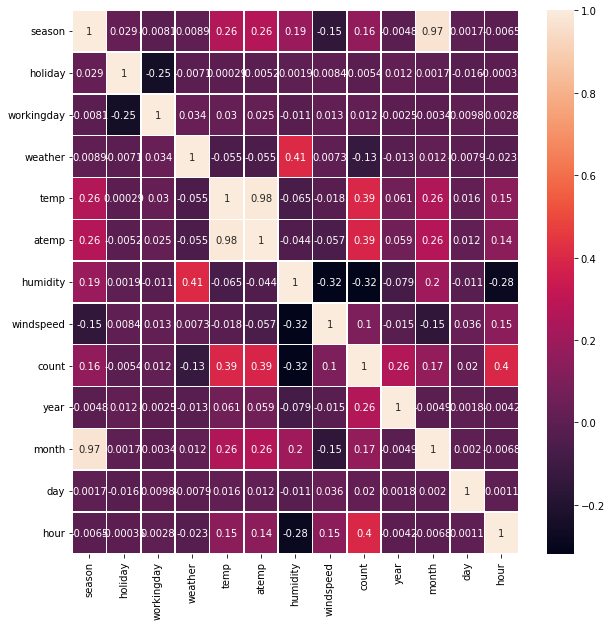

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, ax=ax)

I see "season" and "month" has same correlation
and "temp" and "atemp" also has same correlation 
Let remove any one from each pair

In [71]:
train=train.drop([ 'temp', 'month'], axis=1)
train

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,day,hour
0,2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,19.695,50,26.0027,336,2012,19,19
10882,2012-12-19 20:00:00,4,0,1,1,17.425,57,15.0013,241,2012,19,20
10883,2012-12-19 21:00:00,4,0,1,1,15.910,61,15.0013,168,2012,19,21
10884,2012-12-19 22:00:00,4,0,1,1,17.425,61,6.0032,129,2012,19,22


In [91]:
#do the same for test
test=test.drop([ 'temp', 'month'], axis=1)
test

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,year,day,hour
0,2011-01-20 00:00:00,1,0,1,1,11.365,56,26.0027,2011,20,0
1,2011-01-20 01:00:00,1,0,1,1,13.635,56,0.0000,2011,20,1
2,2011-01-20 02:00:00,1,0,1,1,13.635,56,0.0000,2011,20,2
3,2011-01-20 03:00:00,1,0,1,1,12.880,56,11.0014,2011,20,3
4,2011-01-20 04:00:00,1,0,1,1,12.880,56,11.0014,2011,20,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,12.880,60,11.0014,2012,31,19
6489,2012-12-31 20:00:00,1,0,1,2,12.880,60,11.0014,2012,31,20
6490,2012-12-31 21:00:00,1,0,1,1,12.880,60,11.0014,2012,31,21
6491,2012-12-31 22:00:00,1,0,1,1,13.635,56,8.9981,2012,31,22


In [73]:
train.corr()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,-0.005215,0.001929,0.008409,-0.005393,0.012021,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.024660,-0.010880,0.013373,0.011594,-0.002482,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055376,0.406244,0.007261,-0.128655,-0.012548,-0.007890,-0.022740
atemp,0.264744,-0.005215,0.024660,-0.055376,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.057473,-0.318607,1.000000,0.101369,-0.015221,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.389784,-0.317371,0.101369,1.000000,0.260403,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.058540,-0.078606,-0.015221,0.260403,1.000000,0.001800,-0.004234
day,0.001729,-0.015877,0.009829,-0.007890,0.011866,-0.011335,0.036157,0.019826,0.001800,1.000000,0.001132


In [74]:
# Consider new feature weekend
# selecting rows based on condition
#workingday - whether the day is neither a weekend nor holiday
#holiday - whether the day is considered a holiday
rslt_df = train[(train['workingday'] == 0) &
          (train['holiday']==0)]
  
rslt_df

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,day,hour
0,2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10809,2012-12-16 19:00:00,4,0,0,1,17.425,93,8.9981,109,2012,16,19
10810,2012-12-16 20:00:00,4,0,0,2,19.695,82,0.0000,122,2012,16,20
10811,2012-12-16 21:00:00,4,0,0,2,18.940,93,0.0000,106,2012,16,21
10812,2012-12-16 22:00:00,4,0,0,2,20.455,82,12.9980,89,2012,16,22


In [75]:
import numpy as np
train['weekend']=np.where((train['workingday']==0) & (train['holiday']==0), 1,0)
test['weekend']=np.where((test['workingday']==0) & (test['holiday']==0), 1,0)
train

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,day,hour,weekend
0,2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000,16,2011,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000,32,2011,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000,13,2011,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000,1,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,19.695,50,26.0027,336,2012,19,19,0
10882,2012-12-19 20:00:00,4,0,1,1,17.425,57,15.0013,241,2012,19,20,0
10883,2012-12-19 21:00:00,4,0,1,1,15.910,61,15.0013,168,2012,19,21,0
10884,2012-12-19 22:00:00,4,0,1,1,17.425,61,6.0032,129,2012,19,22,0


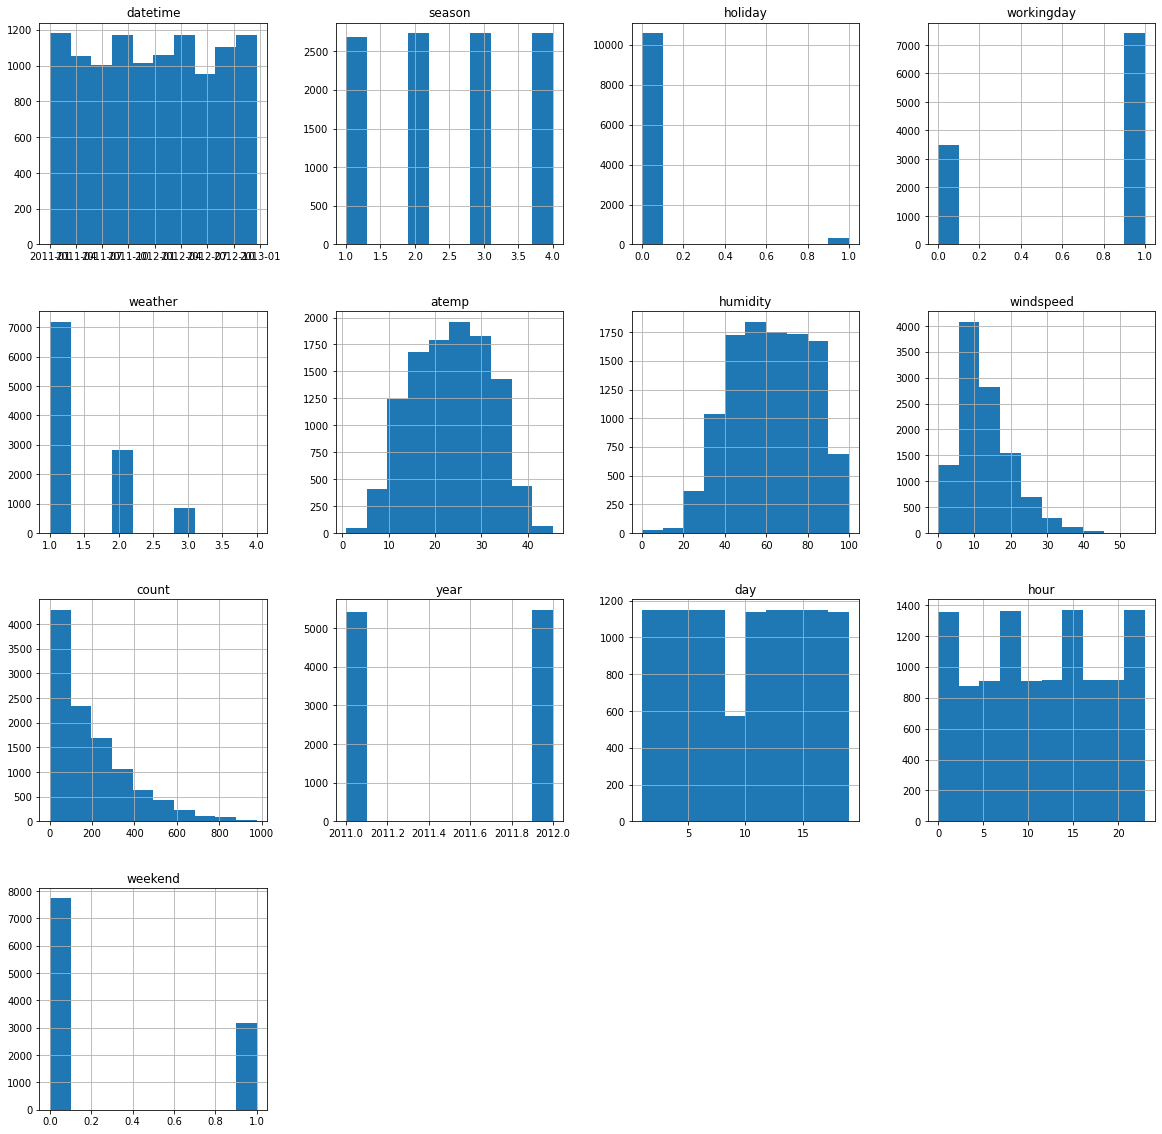

In [76]:
train.hist(figsize=(20,20));

In [79]:
train.describe(include="all").transpose()

<ipython-input-79-f382fdf3347a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include="all").transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01,1,2011-01-01,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaT,NaN,NaT,NaT,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaT,NaN,NaT,NaT,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaT,NaN,NaT,NaT,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaT,NaN,NaT,NaT,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
atemp,10886.0,NaN,NaT,NaN,NaT,NaT,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaT,NaN,NaT,NaT,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaT,NaN,NaT,NaT,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
count,10886.0,NaN,NaT,NaN,NaT,NaT,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0
year,10886.0,NaN,NaT,NaN,NaT,NaT,2011.501929,0.500019,2011.0,2011.0,2012.0,2012.0,2012.0


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [93]:
categorical_columns=[ 'windspeed',  'holiday', 'workingday', 'weather', 'year', 'season', 'day', 'hour']
for each in categorical_columns:
    train[each] = train[each].astype('category')
    test[each] = test[each].astype('category')

train.dtypes
test.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
atemp                float64
humidity               int64
windspeed           category
year                category
day                 category
hour                category
weekend                int64
dtype: object

In [81]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,day,hour,weekend
0,2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0,16,2011,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0,32,2011,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0,13,2011,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0,1,2011,1,4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f874ca280>,
      dtype=object)

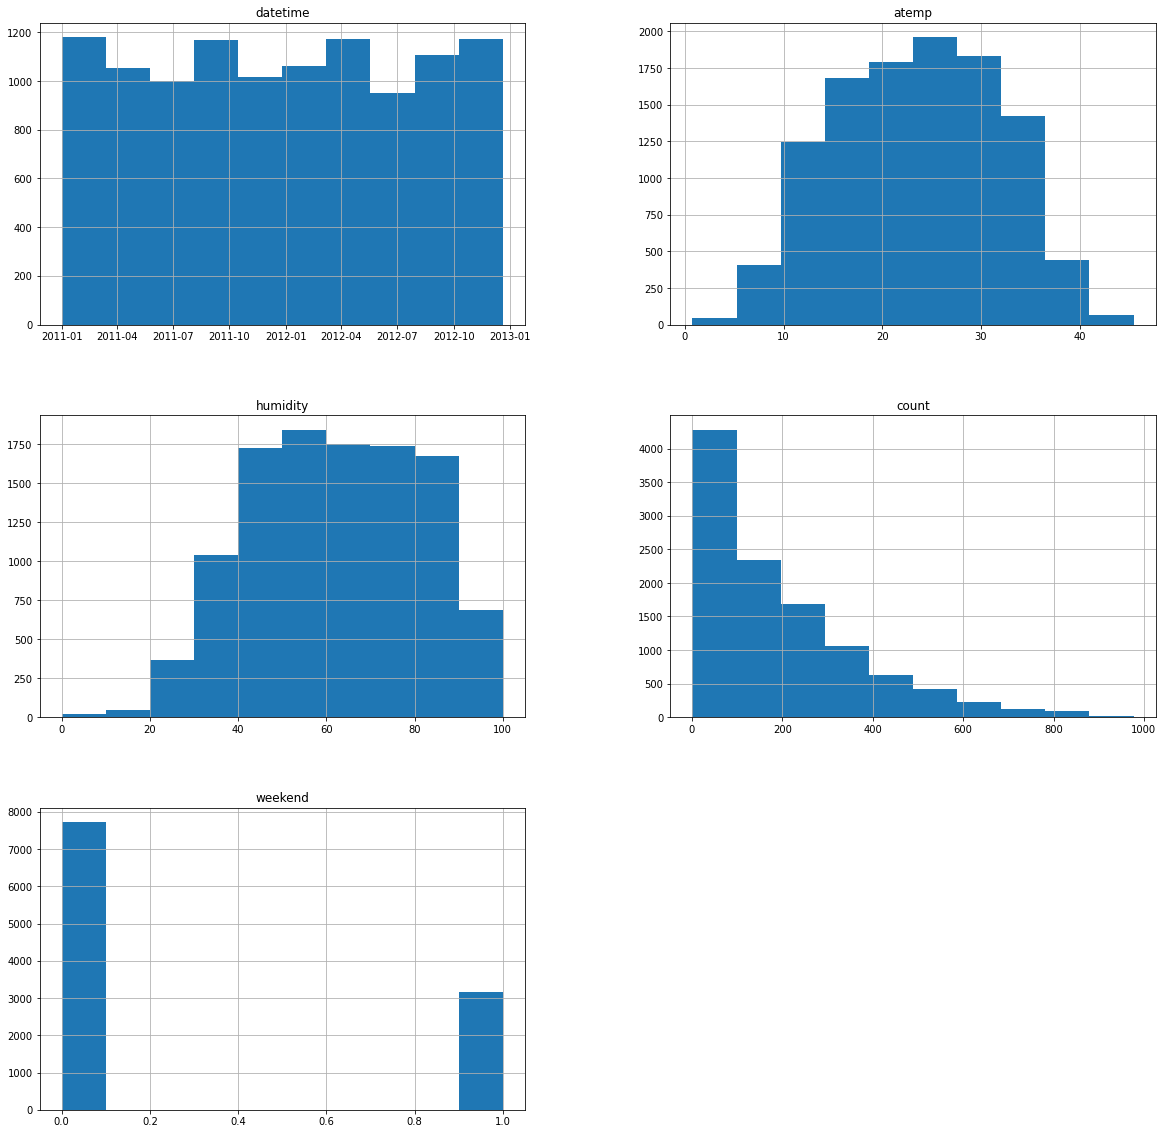

In [82]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [83]:
predictor_new_features = TabularPredictor(label='count', eval_metric="root_mean_squared_error").fit(train_data=train,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230111_091542/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230111_091542/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [84]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.684205      21.647735  529.495664                0.001071           0.303647            3       True         14
1        LightGBMXT_BAG_L2  -31.153505      20.709728  436.262100                1.092707          35.701954            2       True         10
2          LightGBM_BAG_L2  -31.186259      20.265945  431.712529                0.648924          31.152383            2       True         11
3          CatBoost_BAG_L2  -31.959773      19.905033  462.337681                0.288012          61.777535            2       True         13
4   RandomForestMSE_BAG_L2  -32.936457      20.474530  437.861898                0.857509          37.301752            2       True         12
5      WeightedEnsemble_L2  -34.111164      19.021258  362.610242         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -36.33089237022782,
  'LightGBM_BAG_L1': -36.12645370196162,
  'RandomForestMSE_BAG_L1': -38.330

In [94]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    15.716606
1    14.557298
2    14.695890
3    12.263104
4     8.844780
Name: count, dtype: float32

In [96]:
predictions_new_features.describe()

count    6493.000000
mean      154.364761
std       131.261368
min         1.146111
25%        52.328609
50%       122.749352
75%       219.795975
max       778.823486
Name: count, dtype: float64

In [97]:
any(predictions_new_features<0)

False

In [98]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [100]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [101]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 924kB/s]
Successfully submitted to Bike Sharing Demand

In [102]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-11 09:33:15  new features          complete  0.70660      0.70660       
submission.csv               2023-01-11 08:28:32  first raw submission  complete  1.80367      1.80367       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [105]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [106]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric="root_mean_squared_error").fit(train_data=train,
    time_limit=600,
    presets="best_quality",
     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 210.97s of remaining time.
	-38.4631	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 390.23s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230111_094849/")


In [107]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -38.463088       0.002741  234.398632                0.001557           1.118016            3       True         12
1    LightGBM_BAG_L2/T2  -38.642935       0.000867  166.344929                0.000145          28.579643            2       True          8
2    LightGBM_BAG_L2/T3  -38.688087       0.000878  167.466743                0.000157          29.701457            2       True          9
3    LightGBM_BAG_L2/T1  -38.730511       0.000882  174.999518                0.000160          37.234231            2       True          7
4    LightGBM_BAG_L2/T5  -39.005482       0.000855  166.405095                0.000134          28.639808            2       True         11
5   WeightedEnsemble_L2  -39.830990       0.001718   56.627902                0.001434      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.94451012373213,
  'LightGBM_BAG_L1/T2': -40.04927373347266,
  'LightGBM_BAG_L1/T3': -41.290630576922005,
  'LightGBM_BAG_L1/T4': -121.69245131446257,
  'LightGBM_BAG_L1/T5': -47.391655241585724,
  'WeightedEnsemble_L2': -39.830989715099214,
  'LightGBM_BAG_L2/T1': -38.73051132577541,
  'LightGBM_BAG_L2/T2': -38.64

In [108]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    8.485704
1    7.536342
2    7.553509
3    7.023463
4    6.748314
Name: count, dtype: float32

In [109]:
any(predictions_new_hpo<0)

False

In [110]:
predictions_new_hpo[predictions_new_hpo<0]=0

In [111]:
# Same submitting predictions
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [112]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 839kB/s]
Successfully submitted to Bike Sharing Demand

In [113]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-11 09:58:05  new features with hyperparameters  complete  0.47974      0.47974       
submission_new_features.csv  2023-01-11 09:33:15  new features                       complete  0.70660      0.70660       
submission.csv               2023-01-11 08:28:32  first raw submission               complete  1.80367      1.80367       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [117]:
predictor.leaderboard(silent=True)['score_val'][0]                  

-52.834229121999165

In [118]:
predictor_new_features.leaderboard(silent=True)['score_val'][0],                 

(-30.684204671340922,)

In [120]:
 predictor_new_hpo.leaderboard(silent=True)['score_val'][0]

-38.463088301065596

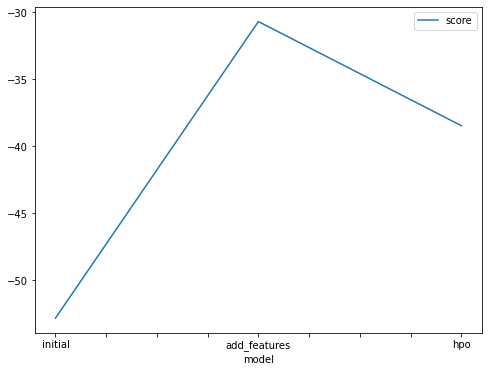

In [116]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.834229, -30.684205, -38.463088]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

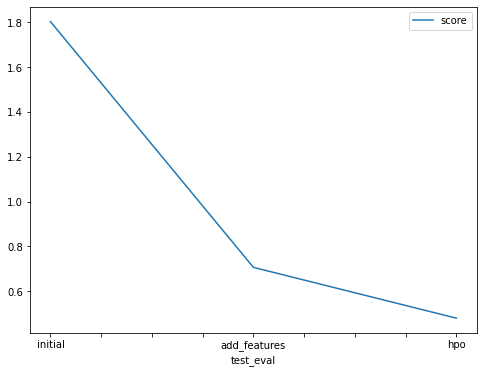

In [115]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80367, 0.70660, 0.47974]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [122]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "Time Limit": [600, 600, 600],
    "num_trials": [1, 1, 5],
    "search_strategy": ["random", "random", "auto"],
    "score": [1.80367, 0.70660, 0.47974]
})

,model,Time Limit,num_trials,search_strategy,score
0,initial,600,1,random,1.80367
1,add_features,600,1,random,0.70660
2,hpo,600,5,auto,0.47974
